In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
Y_train[:7]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2]], dtype=uint8)

In [9]:
Y_train=Y_train.reshape(-1,)
Y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [17]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

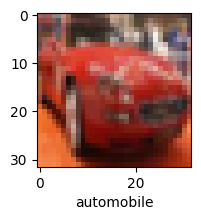

In [19]:
plot_sample(X_train,Y_train,5)

In [20]:
#normalizing our data
X_train=X_train/255
X_test=X_test/255

In [24]:
#creating ann model
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid"),
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.8112 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 163s 104ms/step - loss: 1.6208 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 170s 109ms/step - loss: 1.5386 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 163s 105ms/step - loss: 1.4787 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 162s 104ms/step - loss: 1.4286 - accuracy: 0.4964


In [25]:
ann.evaluate(X_test,Y_test)

313/313 [==============================] - 17s 51ms/step - loss: 1.6428 - accuracy: 0.4081


[1.6427576541900635, 0.4081000089645386]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
Y_pred=ann.predict(X_test)
Y_pred_classes=[np.argmax(element) for element in Y_pred]

print(f"classification report: \n {classification_report(Y_test,Y_pred_classes)}")

313/313 [==============================] - 11s 34ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.59      0.46      0.52      1000
           1       0.76      0.38      0.51      1000
           2       0.47      0.15      0.22      1000
           3       0.45      0.06      0.10      1000
           4       0.40      0.36      0.38      1000
           5       0.37      0.38      0.38      1000
           6       0.60      0.33      0.43      1000
           7       0.22      0.89      0.36      1000
           8       0.64      0.59      0.61      1000
           9       0.56      0.49      0.52      1000

    accuracy                           0.41     10000
   macro avg       0.51      0.41      0.40     10000
weighted avg       0.51      0.41      0.40     10000



In [30]:
#creating cnn model
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax"),
])

In [31]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [33]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 40ms/step - loss: 1.5223 - accuracy: 0.4519
Epoch 2/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.1760 - accuracy: 0.5883
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0609 - accuracy: 0.6302
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9930 - accuracy: 0.6514
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9373 - accuracy: 0.6724
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8941 - accuracy: 0.6889
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8561 - accuracy: 0.7025
Epoch 8/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8202 - accuracy: 0.7136
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7869 - accuracy: 0.7259
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [34]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9437 - accuracy: 0.6845


[0.9437099695205688, 0.684499979019165]

In [41]:
Y_test=Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

TypeError: ignored

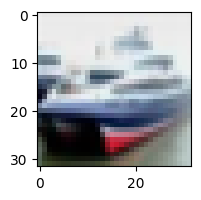

In [36]:
plot_sample(X_test,Y_test,1)

In [37]:
Y_pred=cnn.predict(X_test)
Y_pred[:7]

313/313 [==============================] - 8s 24ms/step


array([[7.4773753e-04, 6.4043226e-05, 1.9264214e-02, 6.8075693e-01,
        2.9924125e-03, 2.6657084e-01, 1.5142972e-02, 3.8162681e-05,
        1.4375104e-02, 4.7622667e-05],
       [1.3848609e-01, 7.5364524e-01, 7.7152063e-06, 6.0570283e-06,
        1.4218165e-05, 8.3916252e-09, 1.6099563e-08, 2.7774621e-07,
        9.3826346e-02, 1.4014061e-02],
       [3.3095397e-02, 3.2008920e-02, 1.6905449e-03, 5.0531202e-03,
        1.7457288e-03, 2.6215776e-04, 6.3986774e-04, 1.4883500e-03,
        9.2027712e-01, 3.7387507e-03],
       [9.6572059e-01, 6.8117469e-03, 4.1891620e-03, 2.1508482e-04,
        9.7946590e-04, 7.5609341e-06, 8.6456646e-05, 7.6392666e-05,
        1.9904248e-02, 2.0091098e-03],
       [1.3002801e-06, 7.4610762e-06, 1.6271653e-02, 1.9160683e-01,
        4.4904056e-01, 1.1862932e-02, 3.3053663e-01, 2.1771142e-05,
        6.4871594e-04, 2.2021857e-06],
       [6.4672263e-06, 9.0883514e-06, 1.0890713e-02, 9.1421660e-03,
        1.3640240e-02, 6.1839377e-03, 9.5863277e-01, 1.44

In [38]:
Y_classes=[np.argmax(element) for element in Y_pred]
Y_classes[:7]

[3, 1, 8, 0, 4, 6, 3]

In [42]:
Y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

In [43]:
print(f"classification report: \n {classification_report(Y_test,Y_classes)}")

classification report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.81      0.80      0.80      1000
           2       0.56      0.60      0.58      1000
           3       0.49      0.52      0.51      1000
           4       0.66      0.56      0.60      1000
           5       0.64      0.54      0.59      1000
           6       0.68      0.81      0.74      1000
           7       0.69      0.76      0.72      1000
           8       0.79      0.78      0.78      1000
           9       0.81      0.74      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

